### MY FIRST DATA SCIENCE COMPETITION
Data Science Nigeria Patient Treatment. 
Medical treatments and surgeries can be categorised into inpatient and outpatient procedures.

#### 1. Importing Libraries

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### 2. Read Data given

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [163]:
train.head(10)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1
5,patient_id_1921,36.3,12.4,4.35,5.3,258,30.2,34.6,87.2,43,F,1
6,patient_id_537,46.8,15.5,5.65,3.8,35,28.7,33.5,85.7,21,M,1
7,patient_id_1589,34.5,11.3,4.20,13.8,286,28.6,33.2,86.0,37,F,1
8,patient_id_2039,36.7,12.5,4.44,19.4,87,29.8,34.5,86.3,45,F,1
9,patient_id_3624,38.8,12.6,4.93,15.5,389,26.9,32.9,81.8,68,F,1


In [9]:
test.head(4)

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F


In [10]:
sample_submission.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


#### 3. Data Exploration

In [11]:
train.shape, test.shape

((3088, 12), (1324, 11))

In [15]:
target = [cols for cols in train.columns if  cols not in test.columns]
target

['SOURCE']

In [143]:
# Asssigning Our Target Variable
y = train['SOURCE']

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id_   3088 non-null   object 
 1   HAEMATOCRIT   3088 non-null   float64
 2   HAEMOGLOBINS  3088 non-null   float64
 3   ERYTHROCYTE   3088 non-null   float64
 4   LEUCOCYTE     3088 non-null   float64
 5   THROMBOCYTE   3088 non-null   int64  
 6   MCH           3088 non-null   float64
 7   MCHC          3088 non-null   float64
 8   MCV           3088 non-null   float64
 9   AGE           3088 non-null   int64  
 10  SEX           3088 non-null   object 
 11  SOURCE        3088 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 289.6+ KB


In [18]:
train.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,38.381865,12.638472,4.752160,8.788504,260.652850,28.218264,33.352364,84.540026,46.617876,0.409974
std,6.070420,2.104983,0.792281,5.055580,115.504157,2.658656,1.227691,6.814936,21.684646,0.491908
min,13.900000,4.300000,1.690000,1.200000,13.000000,14.900000,26.400000,54.000000,1.000000,0.000000
25%,34.500000,11.275000,4.240000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.800000,12.800000,4.790000,7.600000,259.000000,28.700000,33.400000,85.400000,47.000000,0.000000
75%,42.700000,14.200000,5.260000,10.400000,325.000000,29.800000,34.100000,88.700000,64.000000,1.000000
max,69.200000,18.100000,8.070000,76.700000,1188.000000,36.800000,39.000000,105.300000,99.000000,1.000000


#### 4. Grouping the features into categorical and Numerical

In [29]:
# You can use;
# categorical_feat = [feat for feat in train.columns if train[feat].dtype == 'O']
# or
categorical_feat = list(train.select_dtypes(include = 'object').columns)
categorical_feat

['patient_id_', 'SEX']

In [147]:
numerical_feat = list(train.select_dtypes(exclude = 'object').columns)
numerical_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SOURCE']

In [148]:
# Having a look into our data based on numerical features only
train[numerical_feat].head(4)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,0
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,0


In [149]:
# Lets drop the 'Source' feature saince its our 'Target' Variable
numerical_feat.remove('SOURCE')

In [150]:
train[numerical_feat].head(4)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52


#### 5. Data Preprocessing

In [151]:
# Scale or normalize The Dataset
scaler = StandardScaler()
X = scaler.fit_transform(train[numerical_feat])
testing = scaler.fit_transform(test[numerical_feat])

In [152]:
X = pd.DataFrame(X, columns = numerical_feat)
testing = pd.DataFrame(testing, columns = numerical_feat)
X.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
0,0.859740,0.884487,0.969308,-1.145159,-0.204812,-0.270204,0.201741,-0.416803,-0.674221
1,0.975071,0.836973,0.426484,-0.294476,-0.048949,0.557415,-0.368527,0.860011,-0.305237
2,-0.359484,-0.065793,-0.229956,-0.195559,0.020324,0.256463,1.342278,-0.284719,0.847840
3,1.271639,0.979515,0.792575,-0.057076,0.513893,0.143605,-0.938796,0.625195,0.248240
4,-1.084428,-0.826018,-0.886395,3.583056,-0.352017,0.143605,1.179345,-0.328747,0.893963


#### 6. Defining  Model
Since there are no Missing values we go straight to splitting our data for model fitting

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
# Train the Model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

In [155]:
# Predict
# We use both the 'X_train and X_test just to ensre we are not over fitting'
pred = logistic_reg_model.predict(X_test)
pred2 = logistic_reg_model.predict(X_train)

#### 7. Evaluating the Model

In [156]:
print('Training set Evalution:')
print(f'Classifier f1_score value is: {f1_score(y_train, pred2)}')
print()
print('Testing set Evalution:')
print(f'Classifier f1_score value is: {f1_score(y_test, pred)}')

Training set Evalution:
Classifier f1_score value is: 0.5917241379310344

Testing set Evalution:
Classifier f1_score value is: 0.6153846153846154


#### 8. Submitting Section

In [157]:
sample_submission.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [158]:
submission_file = sample_submission.copy()
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [159]:
submission_file.SOURCE = logistic_reg_model.predict(testing)

In [160]:
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,1


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOURCE', ylabel='count'>

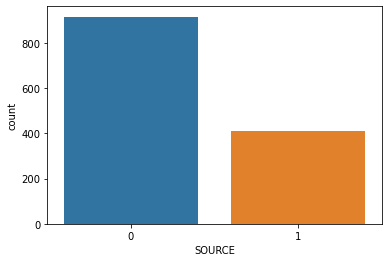

In [161]:
sns.countplot(submission_file.SOURCE)

In [162]:
submission_file.to_csv('my_first_submission.csv', index = False)